<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.856 · Anàlisi de sentiments i xarxes socials</p>
<p style="margin: 0; text-align:right;">Màster universitari de Ciència de Dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Anàlisi de sentiments i xarxes socials
## PLA6: Visualització de xarxes

# Introducció

Aquest notebook explora les funcionalitats de generació de visualitzacions de grafs de la llibreria Networkx.
En primer lloc, es presenta la funció bàsica de visualització de grafs i es detallen alguns dels paràmetres que permeten ajustar les propietats d'aquesta visualització.
En segon lloc, s'exposen alguns dels algorismes de posicionament de nodes més populars, que s'usen per a decidir on situar cadascun dels nodes del graf en la imatge.
Després, es detallen algunes funcions d'exportació de grafs, que permeten usar grafs networkx en programes especialitzats de visualització de grafs.
Finalment, es presenta un exemple del procés de creació d'una visualització d'un graf més gran. 
Recordeu que podeu anar executant els exemples que s'inclouen en els notebooks per a reproduir-los i obtenir-ne els resultats. A més, us animem a modificar el codi dels exemples i executar les vostres modificacions, per anar explorant tot el potencial de les llibreries que es presenten als notebooks i els algorismes que es detallen.

## 1. Visualització bàsica de grafs

Networkx disposa de la funció  [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) que permet generar una visualització d'un graf. La funció rep com a únic paràmetre obligatori el graf que es vol dibuixar, i genera la imatge resultant. Vegem un exemple senzill:

In [1]:
# Activem matplotlib i indiquem que es mostrin els plots en el mateix notebook
# usant un magic command de Jupyter
%matplotlib inline

# Importem networkx, pyplot i numpy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

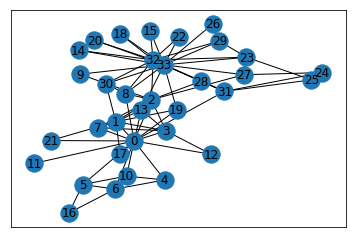

In [2]:
# Carreguem i visualitzem el graf del club de karate
g = nx.karate_club_graph()
nx.draw_networkx(g)

En comptes de visualitzar la imatge del graf al notebook, també podem crear un arxiu amb la imatge del graf, que podem usar després fora del notebook:

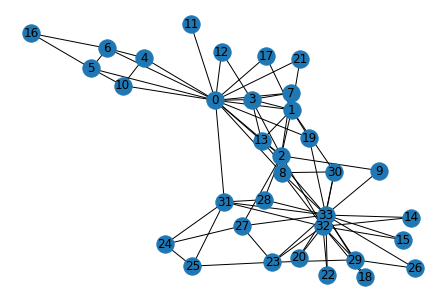

In [3]:
# Guardem la imatge en l'arxiu karate_club.png
nx.draw(g, with_labels=True)
plt.savefig("karate_club.png")

## 2. Ajustar la visualització

La funció [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) disposa de multitud de paràmetres opcionals que permeten ajustar les propietats de la visualització que es vol generar. Així, per exemple, el paràmetre `with_labels` permet controlar si les etiquetes dels nodes s'inclouen en la imatge o no:

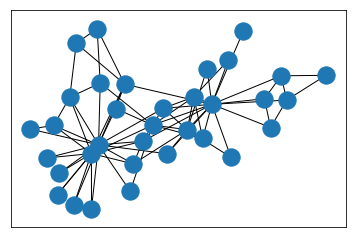

In [4]:
# Mostrem un graf sense incloure les etiquetes dels nodes
nx.draw_networkx(g, with_labels=False)

Al contrari, sovint és útil incloure etiquetes en el graf, però les etiquetes que volem visualitzar no coincideixen amb els identificadors dels nodes. En aquest cas, una alternativa possible passa per tornar a nomenar els nodes del graf:

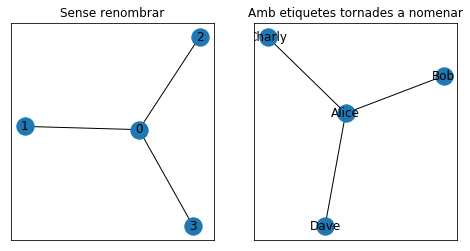

In [5]:
# Generem un graf estrella de 4 nodes
g = nx.star_graph(3)
plt.figure(num=None, figsize=(8, 4))

# Mostrem el graf amb les etiquetes originals
ax = plt.subplot(1, 2, 1)
plt.title("Sense renombrar")
nx.draw_networkx(g)

# Mostrem el graf amb les etiquetes tornades a nomenar
ax = plt.subplot(1, 2, 2)
plt.title("Amb etiquetes tornades a nomenar")
names = ['Alice', 'Bob', 'Charly', 'Dave']
g2 = nx.relabel_nodes(g, {i:name for i, name in enumerate(names)})
nx.draw_networkx(g2)

Es pot ajustar la mida, el color, la transparència i la forma geomètrica que representa cada node amb els paràmetres `node_size`, `node_color`, `alpha`, `node_shape`, respectivament:

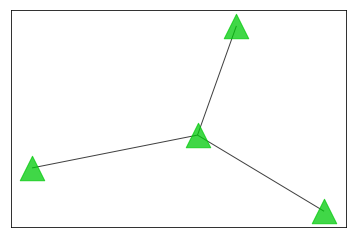

In [6]:
# Mostrem un graf sense etiquetes, fixant el color, la mida i la forma dels nodes
nx.draw_networkx(g, with_labels=False, node_size=600, node_color="#00CA09" , node_shape="^", alpha=0.75)

D'una manera similar, també podem ajustar el color de les arestes (`edge_color`) i el seu gruix  (`width`):

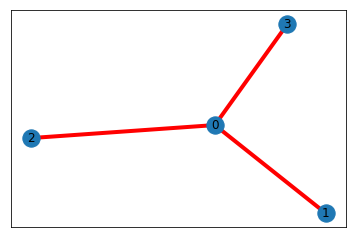

In [7]:
# Mostrem un graf amb arestes vermelles de gruix 4
nx.draw_networkx(g, edge_color='r', width=4)

Si incloem les etiquetes dels nodes en la imatge, llavors podem configurar també la mida (`font_size`), color (`font_color`), el tipus (`font_weight`) i família (`font_family`):

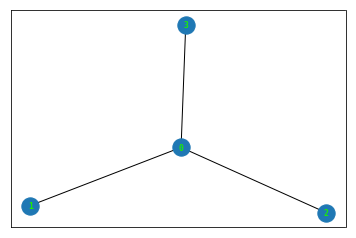

In [8]:
# Mostrem un graf amb etiquetes ajustant-ne les propietats
nx.draw_networkx(g, font_size=8, font_color='#1DEE04', font_weight='bold', font_family='monospace')            

Si el graf és dirigit, aleshores podem visualitzar la direcció de les arestes fixant el paràmetre `arrows` a `True`:

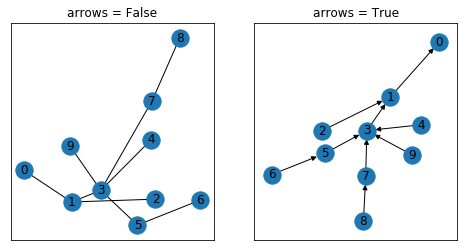

In [9]:
# Generem un graf dirigit
g = nx.gn_graph(10)

plt.figure(num=None, figsize=(8, 4))

# Mostrem el graf especificant visualitzar o no les direccions de les arestes
ax = plt.subplot(1, 2, 1)
plt.title("arrows = False")
nx.draw_networkx(g, arrows=False)

ax = plt.subplot(1, 2, 2)
plt.title("arrows = True")
nx.draw_networkx(g, arrows=True)

Fixeu-vos que, encara que el graf sigui dirigit, si no especifiquem explícitament que volem mostrar la direcció dels arcs, llavors aquesta no es visualitza.

La funció [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) també permet especificar un subconjunt de nodes o arestes del graf que es vol dibuixar. Això pot ser útil per a visualitzar solament una part del graf, o bé per a aplicar propietats diferents a diferents elements del graf. Per exemple, podem mostrar amb colors diferents els nodes en funció del seu grau:

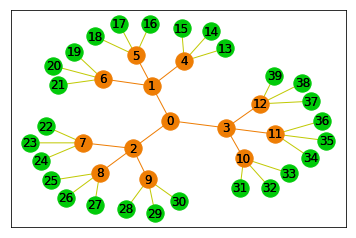

In [10]:
# Creem un arbre balancejat
g = nx.balanced_tree(3, 3)

# Creem una llista amb els nodes de grau 1 i una altra amb els nodes de grau diferent a 1
deg_one = [n for n, d in dict(g.degree()).items() if d == 1]
deg_not_one = [n for n, d in dict(g.degree()).items() if d != 1]
pos = nx.kamada_kawai_layout(g)

# Creem una llista amb les arestes que tenen algun node de grau 1 i una altra amb la resta
edge_one = [e for e in g.edges() if e[0] in deg_one or e[1] in deg_one]
edge_not_one = [e for e in g.edges() if e not in edge_one]

# Mostrem els nodes i les arestes en dos colors
nx.draw_networkx(g, pos=pos, nodelist=deg_one, node_color="#00CA09", edgelist=edge_one, edge_color="#C1CA04")
nx.draw_networkx(g, pos=pos, nodelist=deg_not_one, node_color="#EE7D04", edgelist=edge_not_one, edge_color="#EE7D04")

A més de la funció [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html), networkx també disposa de les funcions  [`draw_networkx_nodes`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes) i [`draw_networkx_edges`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_edges) que permeten visualitzar, respectivament, els nodes i les arestes del graf. El mateix comportament d'aquestes funcions es pot aconseguir ajustant els paràmetres de [`draw_networkx`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html), com hem vist anteriorment. 

## 3.  Algorismes de posicionament dels nodes

### 3.1 La necessitat de bons algorismes de posicionament de nodes

A l'hora de generar una visualització del graf, la posició dels nodes en el plànol és un detall crucial: un bon posicionament ens facilitarà la lectura del graf, així com també la interpretació de la informació que vulguem transmetre en generar la visualització.
Així, per exemple, podem comparar les dues visualitzacions següents d'un graf estrella:

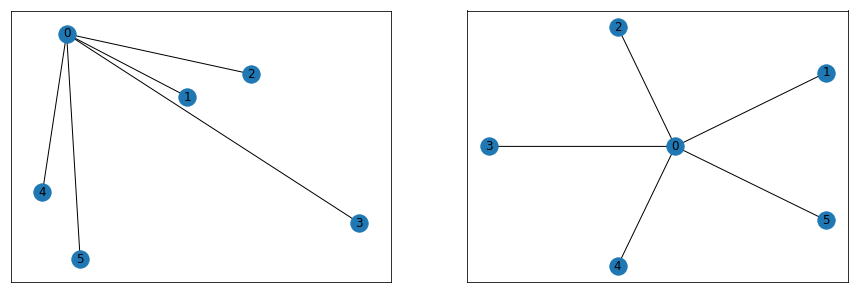

In [11]:
g = nx.star_graph(5)

# Creem tres visualitzacions del graf 1, utilitzant la mida dels nodes per a indicar el grau,
# la centralitat d'intermediació i la centralitat de proximitat, respectivament
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 2, 1)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 2, 2)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)


Mentre que observant la visualització de l’esquerra, triguem uns segons a identificar que es tracta d'un graf estrella i que el node 0 és el node central al qual estan connectats la resta de nodes del graf, arribar a aquesta mateixa conclusió observant la imatge de la dreta és gairebé immediat.

Vegem un exemple encara més exagerat: seríeu capaços de respondre a les preguntes següents sobre el graf que es troba a continuació?

1.	Quin és el node amb més centralitat d'intermediació?
2.	Quants nodes té el graf?
3.	Quants nodes de grau 3 té el graf?
4.	Hi ha alguna estructura de comunitats en el graf?

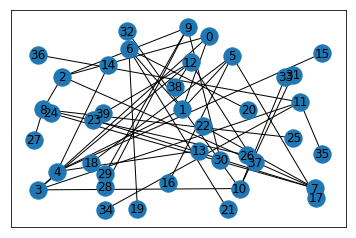

In [12]:
g = nx.balanced_tree(3, 3)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

La veritat és que respondre a qualsevol de les preguntes anteriors a partir de la visualització del graf és una tasca tediosa, en la qual és fàcil cometre errors. En canvi, si ajustem la posició dels nodes del graf, veurem que les preguntes plantejades es poden respondre amb facilitat: 

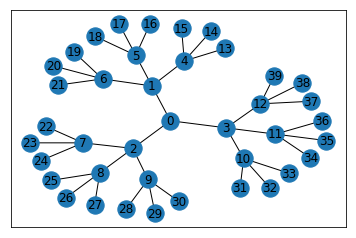

In [13]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos=pos)

### 3.2 Especificar posicions amb networkx

Les funcions de dibuix de grafs de networkx (draw_networkx, draw_networkx_nodes, draw_networkx_edges) reben com a paràmetre `pos`, un diccionari amb les posicions dels nodes (les claus del diccionari són els nodes, i els valors corresponen a un *array* amb les coordenades de la posició en les quals s’ha de mostrar cada node).  

In [14]:
# Importem pprint, que ens permet printar diccionaris de manera que siguin
# fàcils de llegir
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [15]:
# Creem un graf estrella
g = nx.star_graph(4)
# Mostrem les posicions dels nodes segons l'algorisme de layout Kamada-Kawai 
pos = nx.kamada_kawai_layout(g)
pp.pprint(pos)

{   0: array([-2.45231554e-07,  1.76278535e-07]),
    1: array([0.99999917, 0.99999962]),
    2: array([-0.99999922,  0.99999974]),
    3: array([-0.99999913, -1.        ]),
    4: array([ 0.99999943, -0.99999954])}


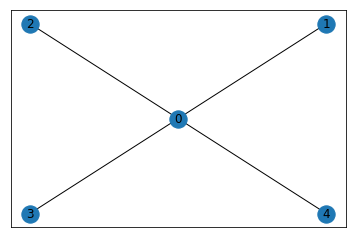

In [16]:
# Mostrem el graf resultant
nx.draw_networkx(g, pos=pos)

Podem ajustar la posició d'un node en la imatge simplement modificant els valors de l'array de posicions. El primer dels valors de l'array permet modificar la posició horitzontal del node (coordenada x), mentre que el segon valor modifica la posició vertical del node (coordenada y): 

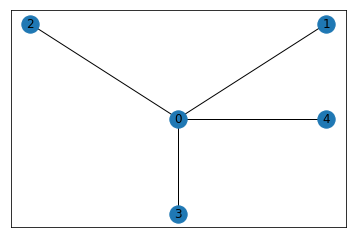

In [17]:
# Fixem la coordenada x del node 3 a 0:
pos[3][0] = 0
# Fixem la coordenada y del node 4 a 0:
pos[4][1] = 0
# Mostrem el graf
nx.draw_networkx(g, pos=pos)

### 3.3 Algorismes de posicionament de nodes

Especificar manualment la posició dels nodes no és viable quan la mida del graf creix, o fins i tot quan tenim clar què volem visualitzar però no quina és la posició ideal de cada node per a aconseguir el nostre objectiu. Tot i que el graf és petit, sovint volem generar una visualització de manera automàtica, sobre la base d'uns criteris generals.

Per tot això, normalment generem visualitzacions dels grafs utilitzant un algorisme de *layout*, que calcula les posicions dels nodes sobre la base d'unes pautes. En aquesta secció, presentarem alguns dels algorismes de *layout* que incorpora la llibreria `networkx`.

Un dels algorismes més bàsics de layout consisteix a assignar les posicions dels nodes de manera uniformement aleatòria. Diferents execucions de l'algorisme donaran lloc a posicionaments dels nodes diferents. La funció [`random_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html#networkx.drawing.layout.random_layout) implementa aquest comportament:

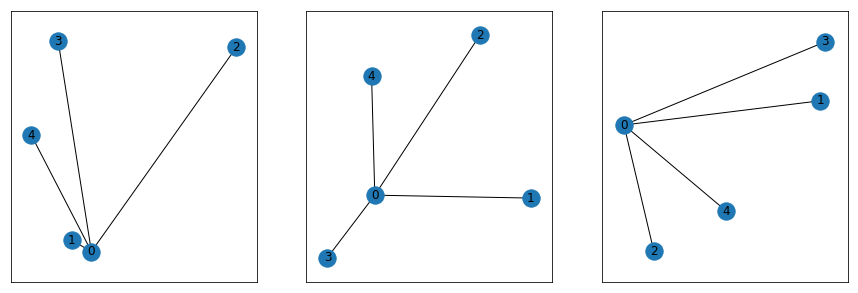

In [18]:
# Creem tres visualitzacions del graf 1, utilitzant la mida dels nodes per a indicar el grau,
# la centralitat d'intermediació i la centralitat de proximitat, respectivament
plt.figure(num=None, figsize=(15, 5))
       
ax = plt.subplot(1, 3, 1)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

L'inconvenient principal d'aquest algorisme de *layout* és que els nodes són situats sense tenir en compte les seves propietats dins del graf (grau, centralitat, comunitat a la qual pertanyen, etc.), i que els nodes poden encavalcar-se. Per aquest motiu, aquest *layout* no acostuma a ser una bona opció per a facilitar la interpretabilitat del graf. Ara bé, l'algorisme és molt senzill d'implementar i permet obtenir una primera visualització del graf.

Un altre algorisme simple és el que genera un *layout* circular  ([`circular_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html#networkx.drawing.layout.circular_layout)), en el qual els nodes es posicionen damunt d'una circumferència (que no es dibuixa explícitament), de manera que la distància entre cada parell de nodes consecutius és la mateixa:

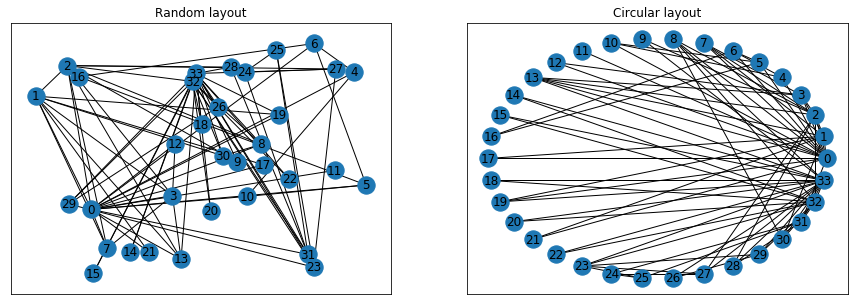

In [19]:
# Creem dues visualitzacions del graf del club de karate, usant 
# un layout aleatori i un de circular
plt.figure(num=None, figsize=(15, 5))
g = nx.karate_club_graph()

ax = plt.subplot(1, 2, 1)
plt.title("Random layout")
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 2, 2)
plt.title("Circular layout")
pos = nx.circular_layout(g)

nx.draw_networkx(g, pos=pos)

Pel que fa al posicionament aleatori dels nodes, la disposició circular genera una imatge més ordenada del graf, que permet dilucidar a primera vista quins són els nodes de més grau i a quin altres nodes estan connectats.

A més, en usar un *layout* circular, tots els nodes tenen una posició similar en la imatge generada: no hi ha cap node amb una posició privilegiada com podria ser, per exemple, el centre de la imatge. Això evita la tendència a percebre un node del graf com més central o més important, simplement perquè està situat en una posició concreta de la imatge.

Hi ha una variant del *layout* circular en el qual els nodes se situen sobre diferents cercles concèntrics: l'algorisme de *shell*  ([`shell_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.shell_layout.html#networkx.drawing.layout.shell_layout)). Vegem un exemple d'una visualització d'un graf usant un posicionament aleatori, circular i de *shell* amb dos cercles concèntrics:


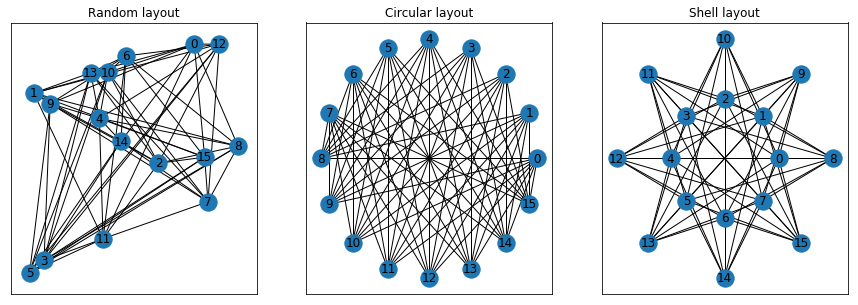

In [20]:
# Comparem un layout aleatori, un de circular, i el layout shell amb dos nivells
plt.figure(num=None, figsize=(15, 5))
g = nx.complete_bipartite_graph(8, 8)

ax = plt.subplot(1, 3, 1)
plt.title("Random layout")
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 2)
plt.title("Circular layout")
pos = nx.circular_layout(g)
nx.draw_networkx(g, pos=pos)

ax = plt.subplot(1, 3, 3)
plt.title("Shell layout")
shells = [range(8), range(8, 16)]
pos = nx.shell_layout(g, shells)
nx.draw_networkx(g, pos=pos)

De nou, a partir del posicionament aleatori (imatge de l'esquerra) és difícil dir res sobre el graf. En canvi, amb el posicionament circular (imatge del centre), podem intuir cert comportament regular en el graf: podem veure que tots els nodes tenen el mateix grau, i les arestes sembla que segueixen algun patró que es repeteix per a cada node. Amb el posicionament de *shell* (imatge de la dreta), es pot descobrir més informació sobre aquest patró: tots els nodes que es troben en la circumferència exterior estan únicament connectats als nodes de la circumferència interior, però no entre ells.

Així, el *layout* de *shell* pot ser útil quan volguem ressaltar algunes propietats d'algun grup de nodes. A més, també és útil quan necessitem mostrar un nombre de nodes elevat en una imatge d'una mida prefixada (fixeu-vos que, en relació amb el posicionament circular, es poden incloure més nodes en una imatge de la mateixa mida sense que s’encavalquin entre ells).

Seguint amb les propietats del graf que estem visualitzant, la imatge de la dreta ens mostra clarament que no hi ha cap aresta entre els nodes de la circumferència exterior, però no queda molt clar si això mateix passa amb els nodes de la circumferència interior. Per a aquest tipus de situacions, es pot usar un posicionament bipartit, que situa els nodes en dos grups (dibuixant-los sobre dues línies rectes):

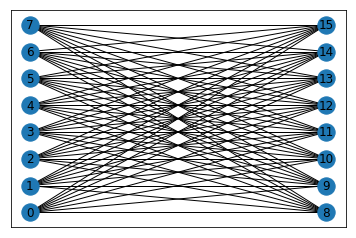

In [21]:
# Mostrem el graf usant un layout bipartit
pos = nx.bipartite_layout(g, nodes=shells[0])
nx.draw_networkx(g, pos=pos)

Amb aquesta visualització, és evident que els nodes de tots dos grups no tenen arestes entre els membres del mateix grup, és a dir, es tracta d'un graf bipartit.

Fins ara hem presentat alguns algorismes simples de posicionament de nodes. Vegem-ne ara alguns una mica més complexos. L'algorisme de posicionament planar ([`planar_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html#networkx.drawing.layout.planar_layout) genera un layout en el qual no hi ha arestes que es creuin entre elles:

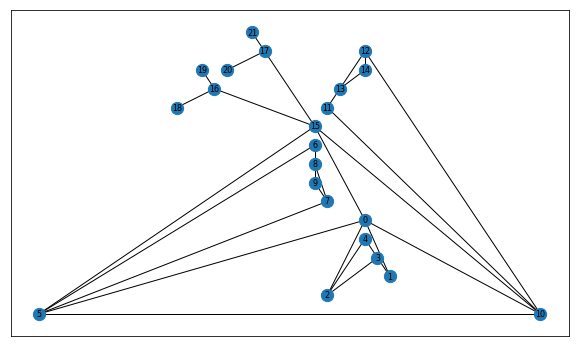

In [22]:
# Creem un graf planar unint grafs simples
g1 = nx.house_graph()
g2 = nx.house_graph()
g3 = nx.house_graph()
g4 = nx.balanced_tree(2, 2)

g = nx.disjoint_union(nx.disjoint_union(nx.disjoint_union(g1, g2), g3), g4)
g.add_edges_from([(0, 5), (5, 10), (0, 10), (10, 15), (5, 15), (0, 15)])

# Mostrem el graf sense creus en les arestes
plt.figure(num=None, figsize=(10, 6))
pos = nx.planar_layout(g)

nx.draw_networkx(g, pos=pos, node_size=150, font_size=8)

Això solament serà possible si el graf és planar (o pla) i, en cas contrari, la funció llançarà una excepció indicant-ho:

In [23]:
try:
    # Afegim 3 arestes al graf anterior, de manera que deixi de ser planar
    g_notplanar = g.copy()
    g_notplanar.add_edges_from([(2, 16), (2, 12), (2, 8)])
    # Intentem generar un layout planar per al graf
    pos = nx.planar_layout(g_notplanar)
except nx.NetworkXException:
    print("El graf no és planar: no és possible generar una visualització sense creuaments d'arestes")

El graf no és planar: no és possible generar una visualització sense creuaments d'arestes


Més enllà de l'algorisme de *layout*, networkx també disposa d'una funció per a comprovar si un graf és planar. 

In [24]:
# Comprovem si els grafs són planars amb la funció check_planarity
is_planar, _ = nx.check_planarity(g)
print("El graf original és planar: {}".format(is_planar))
is_planar, _ = nx.check_planarity(g_notplanar)
print("El graf amb les 3 arestes addicionals és planar: {}".format(is_planar))

El graf original és planar: True
El graf amb les 3 arestes addicionals és planar: False


Un conjunt d'algorismes de posicionament de nodes força utilitzat per a generar grafs estèticament bons és el dels algorismes dirigits per força, que prenen el seu nom del fet que es basen a assignar forces entre nodes o arestes del graf i usen aquestes forces per a calcular les posicions del node. Alguns dels criteris estètics que intenten aconseguir aquests algorismes són minimitzar el nombre de creuaments d'arestes, fer que la longitud de les arestes sigui similar o intentar reflectir la simetria del graf.

Aquests algorismes es descriuen habitualment amb una metàfora que involucra molles. Els nodes del graf es visualitzen com rodes d'acer, que estan connectades entre si amb molles en substitució de les arestes. Inicialment, els nodes se situen aleatòriament en el plànol i, després, es deixen anar, deixant que les forces de les molles actuin i determinin la posició final dels nodes (que serà un estat d'energia mínim).

Els algorismes d'aquesta família es diferencien entre ells en detalls com quines forces s'apliquen, com es recalculen o com s'optimitza el seu càlcul per a poder-los aplicar a grafs grans.

La funció [`spring_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) implementa l'algorisme dirigit per força de Fruchterman-Reingold. Generarem tres visualitzacions del mateix graf usant aquesta funció:

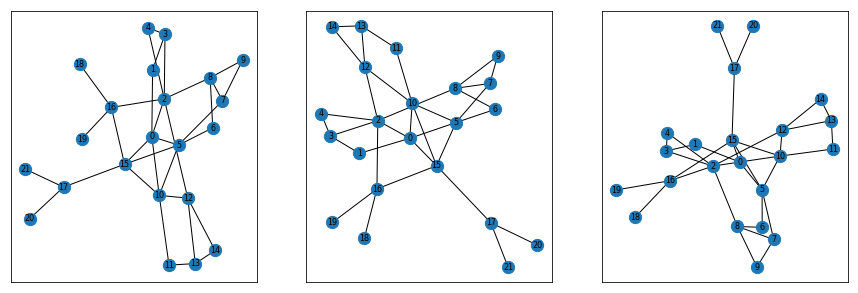

In [25]:
# Mostrem tres execucions de l'algorisme de layout spring per a un mateix graf
plt.figure(num=None, figsize=(15, 5))

for i in range(1, 4):
    ax = plt.subplot(1, 3, i)
    pos = nx.spring_layout(g_notplanar)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

Fixeu-vos que, en primer lloc, les visualitzacions generades tenen certa semblança entre elles, però el component aleatori de l'algorisme fa que les imatges generades difereixin. En segon lloc, les arestes del graf tenen una longitud similar i, encara que hi ha algun encreuament entre elles, no són gaires i no entorpeixen la visualització del graf.

L'algorisme de Fruchterman-Reingold és iteratiu, de manera que l'estat d'energia mínima es va aproximant amb cada nova iteració. Vegem, doncs, com influeix el nombre d'iteracions en la visualització final del graf:

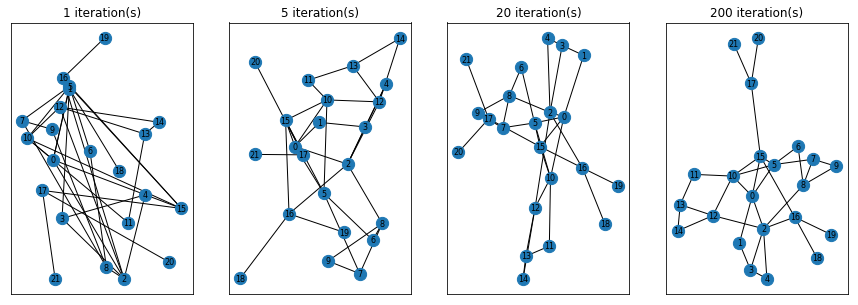

In [26]:
# Mostrem quatre execucions de l'algorisme de layout spring per a un mateix graf,
# variant el nombre d'iteracions que s’han d’executar en l'algorisme
plt.figure(num=None, figsize=(15, 5))

iterations = [1, 5, 20, 200]
for i, its in enumerate(iterations):
    ax = plt.subplot(1, 4, i+1)
    plt.title("{} iteration(s)".format(its))
    pos = nx.spring_layout(g_notplanar, iterations=its)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

La funció [`spring_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) disposa d'altres paràmetres addicionals que permeten ajustar l'execució de l'algorisme. Així, per exemple, el paràmetre `k` permet especificar la distància òptima entre els nodes del graf:

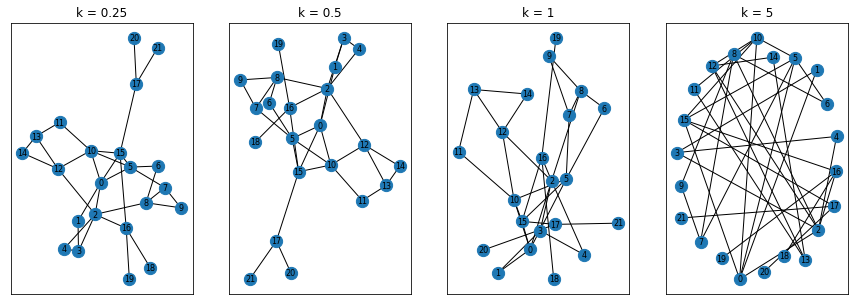

In [27]:
# Mostrem quatre execucions de l'algorisme de layout spring per a un mateix graf,
# variant el valor de la distància òptima entre nodes
plt.figure(num=None, figsize=(15, 5))

ks = [0.25, 0.5, 1, 5]
for i, k in enumerate(ks):
    ax = plt.subplot(1, 4, i+1)
    plt.title("k = {}".format(k))
    pos = nx.spring_layout(g_notplanar, k=k)
    nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

Un altre dels algorismes dirigits per força és l'algorisme de Kamada-Kawai, implementat per la funció [`kamada_kawai_layout`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html#networkx.drawing.layout.kamada_kawai_layout) de networkx:

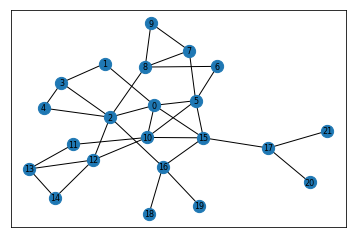

In [28]:
# Mostrem el graf amb un layout calculat amb Kamada-Kawai
plt.figure(num=None, figsize=(6, 4))
pos = nx.kamada_kawai_layout(g_notplanar)
nx.draw_networkx(g_notplanar, pos=pos, node_size=150, font_size=8)

HFins ara hem usat funcions de *layout* que calculen la posició dels nodes i després hem utilitzat aquestes posicions per a generar la imatge del graf. Ara bé, també hi ha funcions que implementen ambdues funcionalitats:

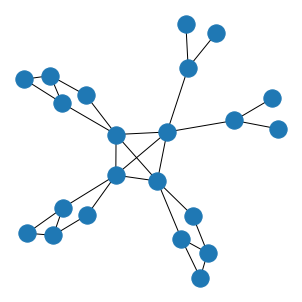

In [29]:
# Usem draw_spring per a generar una visualització d'un graf usant 
# l’algorisme de layout spring
plt.figure(num=None, figsize=(4, 4))
nx.draw_spring(g)

## 4. Ús de programari extern

De vegades, necessitarem generar visualitzacions de grafs que, per les característiques del graf o de la mateixa visualització, seran difícils de generar usant networkx. En aquests casos, és habitual exportar el graf a un fitxer de text usant algun dels formats de descripció de grafs i importar-lo després al programari específic de visualització, per exemple [gephi](https://gephi.org/). No hi ha un únic format estàndard de descripció de grafs, però alguns dels més populars són `gml`, `graphml` o `gexf`. Podeu trobar la llista completa de formats pels quals networkx inclou funcions de lectura i escriptura en la [documentació oficial de networkx](https://networkx.github.io/documentation/stable/reference/readwrite/index.html).

In [30]:
# Exportem el graf g a gml, graphml i gexf
nx.write_gml(g, "./graph.gml")
nx.write_graphml(g, "./graph.graphml")
nx.write_gml(g, "./graph.gexf")

## 5. Un exemple complet

Per acabar, veurem un exemple complet de creació d'una visualització d'un graf. En concret, usarem el conjunt de dades [soc-wiki-Vote](http://networkrepository.com/soc-wiki-Vote.php), que conté els vots de la wikipedia des dels seus inicis fins al gener de 2008. Els nodes de la xarxa són usuaris de wikipedia, i un arc de l'usuari  $u_i$ a l'usuari $u_j$ indica que l'usuari $u_i$ va votar a l'usuario $u_j$.

En primer lloc, carreguem les dades i mostrem les propietats bàsiques del graf. Per començar, obviarem la direcció de les arestes (usarem un graf no dirigit per a representar les dades):

In [32]:
# Carreguem les dades en un graf (soc-wiki-Vote.mtx conté les dades com una llista d'arestes)
g = nx.read_edgelist("data/soc-wiki-Vote.mtx", comments='%')
print("The graph has {} nodes and {} edges".format(g.number_of_nodes(), g.size()))

The graph has 889 nodes and 2914 edges


Per tenir una primera idea de com és el graf, podem intentar generar una imatge amb la posició dels nodes seleccionada aleatòriament i usant els valors per defecte de tots els paràmetres de visualització:

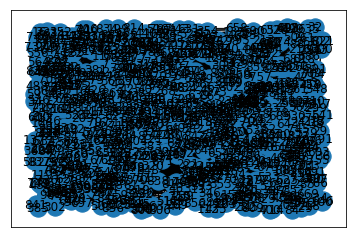

In [33]:
# Mostrem el graf usant un layout aleatori
pos = nx.random_layout(g)
nx.draw_networkx(g, pos=pos)

La imatge és nefasta, en el sentit que és incapaç de transmetre cap informació sobre el graf, més enllà de poder afirmar que el nombre de nodes és superior al centenar. 

Per intentar millorar la visualització, reduirem la grandària dels nodes, els farem semitransparents i eliminarem les etiquetes. Això hauria de permetre començar a veure les arestes del graf, que no es veuen en la imatge anterior per la gran quantitat d'espai que ocupen els nodes. A més, aplicarem un algorisme de posicionament dels nodes dirigit per força per a intentar minimitzar creuaments d'arestes i generar una imatge agradable estèticament. Finalment, destinarem una mica més d'espai a visualitzar la imatge:

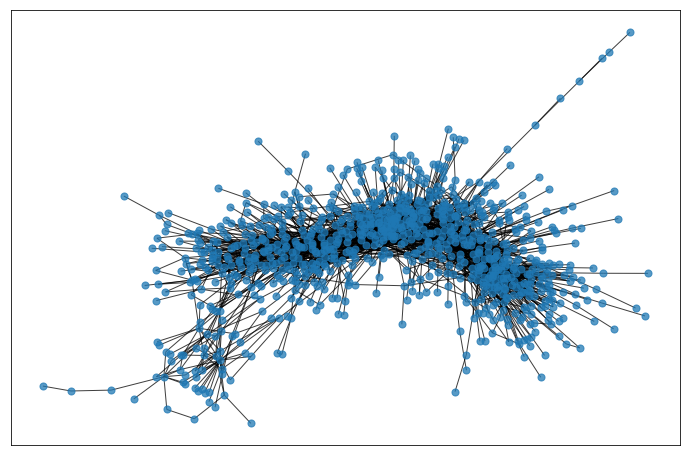

In [34]:
# Ajustem els paràmetres de visualització de nodes
# i l'algorisme de layout
plt.figure(num=None, figsize=(12, 8))
pos = nx.spring_layout(g, seed=41)
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=50, alpha=0.75)

Ara podem distingir la majoria dels nodes i podem veure que la xarxa és connexa i bastant densa. Hi ha alguns nodes que tenen grau 1, però la gran majoria tenen un grau superior.

Acolorim els nodes segons la comunitat a la qual pertanyen, detectant les comunitats amb la funció
 [`greedy_modularity_communities`](https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html):

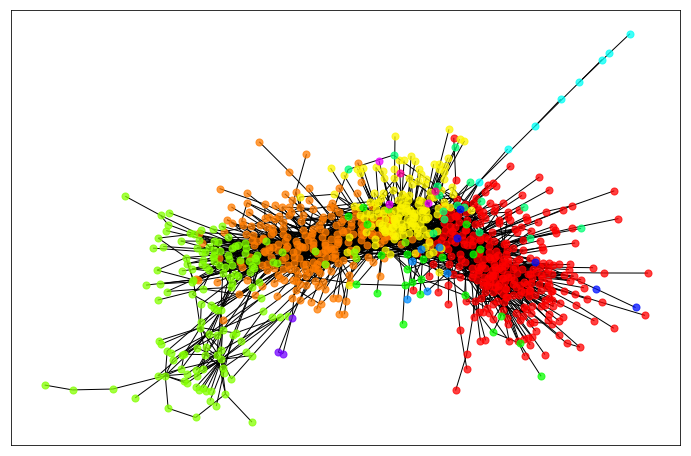

In [35]:
from networkx.algorithms import community as nxcom

# Acolorim els nodes segons la comunitat detectada a la qual pertanyen

plt.figure(num=None, figsize=(12, 8))

com_mod = nxcom.greedy_modularity_communities(g)
nx.draw_networkx_edges(g, pos=pos)
for i, group in enumerate(com_mod):
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[plt.cm.hsv(i/len(com_mod))], 
                           node_size=50, alpha=0.75)

Com podem apreciar, l'algorisme de *layout* és bastant bo posicionant els nodes que pertanyen a la mateixa comunitat propers entre ells. Es distingeixen clarament quatre comunitats força grans i algunes comunitats petites que contenen uns pocs nodes.

Pel que fa a la visualització, hi ha alguns nodes que s’encavalquen i, encara que hàgim aplicat transparència als colors d’aquests, en les zones més poblades costa de distingir la quantitat de nodes que es mostren. Una manera possible de millorar aquest detall és mostrar el contorn dels nodes, usant un color una mica més fort que el que s'utilitza a l'interior.

A més, encara que la imatge anterior permet identificar fàcilment aquells nodes de grau 1, és difícil identificar els *hubs* del graf. Canviarem la mida dels nodes, de manera que depengui del graf del node, i així mostrarem més grans els nodes amb més grau:

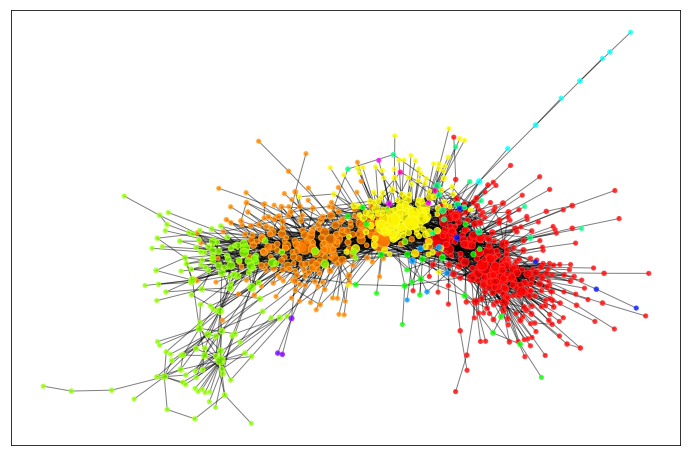

In [36]:
# Mostrem el contorn dels nodes i assignem la mida del node
# segons el seu grau
plt.figure(num=None, figsize=(12, 8))

nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=[min(1, e+0.2) for e in cmap(i/len(com_mod))])

Pel que fa a la identificació individual de cada node, encara que aquesta ha millorat, encara és difícil distingir els nodes vermells i grocs. Una alternativa possible seria modificar els colors utilitzats per a representar cada comunitat. Una altra alternativa podria ser canviar el color de la vora dels nodes, per afavorir que es puguin distingir:

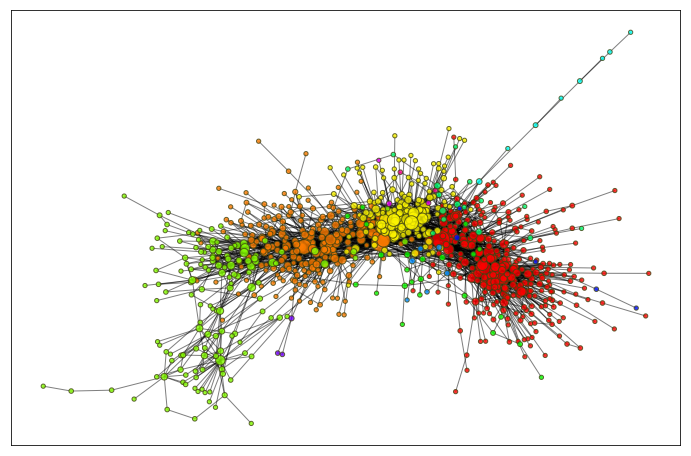

In [37]:
# Acolorim el contorn dels nodes en gris
plt.figure(num=None, figsize=(12, 8))
nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=["#414412"])

Efectivament, en la imatge anterior podem distingir clarament els nodes i identificar quins tenen un grau més gran.

Al principi d'aquest exemple, hem decidit obviar la direcció de les arestes del graf. Intentem recuperar aquesta informació i incloure-la en la visualització generada. En primer lloc, carregarem el graf usant també la funció [`read_edge_list`](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html), però especificant explícitament que es tracta d'un graf dirigit: 

In [38]:
# Carreguem el graf explicitant que sigui un graf dirigit
g = nx.read_edgelist("data/soc-wiki-Vote.mtx", comments='%', create_using=nx.DiGraph)
print("The graph has {} nodes and {} edges".format(g.number_of_nodes(), g.size()))
print("The graph is directed: {}".format(g.is_directed()))

The graph has 889 nodes and 2914 edges
The graph is directed: True


Ara, mostrarem el graf utilitzant l'última configuració que hem utilitzat per al cas no dirigit, però especificant el graf dirigit:

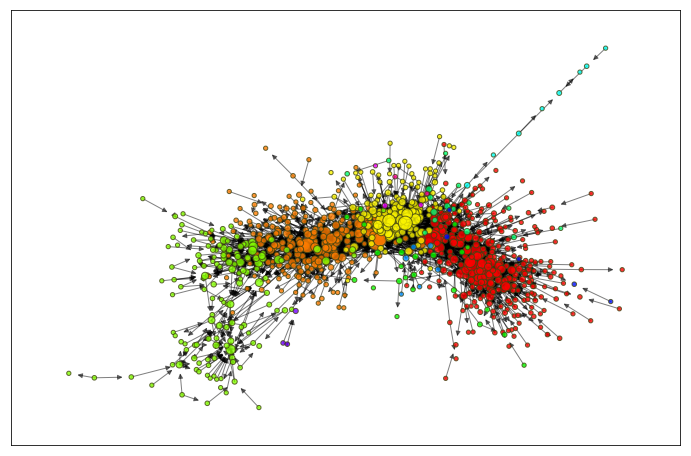

In [39]:
# Visualitzem la direcció de les arestes
plt.figure(num=None, figsize=(12, 8))
nx.draw_networkx_edges(g, pos=pos, alpha=0.5)
cmap, min_size, k = plt.cm.hsv, 15, 3
for i, group in enumerate(com_mod):
    sizes = [min_size+g.degree(node)*k for node in group]
    nx.draw_networkx_nodes(g, pos=pos, nodelist=group, node_color=[cmap(i/len(com_mod))], 
                           node_size=sizes, alpha=0.8, edgecolors=["#414412"])